# Dataset

In [ ]:
import requests
import tarfile

import os #An easy portable way of using the Operating System


# URL of the dataset
url = "https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar" #We are downloading the data set (photos of individuals) online.
# if we copy this URL to the browser then the images would be downloaded on the desctop.

# Path to save the dataset
save_path = "wiki_crop.tar" #This saves the path of where the Dataset file was downloaded.

# Download the dataset
response = requests.get(url, stream=True) #Sending a Get requeset to the specified URL to Download the Dataset. The Stream=True indicated us allowing a large file to be downloaded.

with open(save_path, 'wb') as file: #Opening the file with the path of the file is save_path. The file is opened in binary
    for chunk in response.iter_content(chunk_size=1024): # Iterating of the file in chunks of 1024.
        if chunk: #If the chunk is not NULL
            file.write(chunk) #Saving every chunk in a seperate file
#The reason is to let the dataset smaller by saving every chunk of data in a file instead of using the entire dataset.

# Extract the dataset
with tarfile.open(save_path, 'r') as tar: #There is a downloaded tar archive in the dataset so we opened the data using tarfile.open() function.
    tar.extractall() #extract the dataset


# Remove the tar file
os.remove(save_path) #After extracting the data we will remove the dataset from our device

print("Download and extraction of dataset completed.")


Download and extraction of dataset completed.


In [ ]:
# #Not working for now
# import zipfile
# # URL of the dataset From Samir
# url = "https://drive.google.com/drive/folders/1HROmgviy4jUUUaCdvvrQ8PcqtNg2jn3G?usp=sharing"

# # Path to save the dataset
# save_path = "pic.zip"

# # Download the dataset
# # Google Drive requires a different process to download, you can't directly use requests.get
# # You might need to use gdown or similar library

# # Extract the dataset
# with zipfile.ZipFile(save_path, 'r') as zip_ref:
#     zip_ref.extractall()

# # Remove the zip file
# os.remove(save_path)

# print("Download and extraction of dataset completed.")


# Data Exploration

In [ ]:
import scipy.io #this library provides functions of working with data files from multiple file formats including MATLAB files.

mat = scipy.io.loadmat('/content/wiki_crop/wiki.mat') #loading the matlab file wiki mat from the specified path
#After loading the data the content of the data is stored in a python like object called mat.

dob = mat['wiki'][0, 0]['dob'][0]                              # date of birth
full_path = mat['wiki'][0, 0]['full_path'][0]                  # path to file
gender = mat['wiki'][0, 0]['gender'][0]                        # gender
photo_taken = mat['wiki'][0, 0]['photo_taken'][0]              # year when the photo was taken
face_score = mat['wiki'][0, 0]['face_score'][0]                # detector score
second_face_score = mat['wiki'][0, 0]['second_face_score'][0]  # second detector score

In [ ]:
# Print the first 5 elements
print("Date of birth for the first Five Images ",dob[:5]) #The Date of birth is not a year number will be explained below were the issue is fixed
print("")
print("------------------------")
print("")
print("Year where the photo was taken for the first Five Images ",photo_taken[:10])
print("")
print("------------------------")
print("")
print("Number of the face score for the first five Images ",face_score[:10])
print("")
print("------------------------")
print("")
print("Number of the second face score for the first Five Images ",second_face_score[:10])
print("")
print("------------------------")
print("")
print("Gender for the first Five Images ",gender[:5])
print("")
print("------------------------")
print("")
# print(full_path[:10])
# print("Images Number:"+str(len(dob)))

Date of birth for the first Five Images  [723671 703186 711677 705061 720044]

------------------------

Year where the photo was taken for the first Five Images  [2009 1964 2008 1961 2012 2012 1971 1982 2007 2011]

------------------------

Number of the face score for the first five Images  [4.30096239 2.6456395  4.32932883       -inf 3.40844242 4.74805638
 4.18482831 3.00635012       -inf       -inf]

------------------------

Number of the second face score for the first Five Images  [       nan 1.94924791        nan        nan        nan        nan
        nan 1.10333958        nan        nan]

------------------------

Gender for the first Five Images  [1. 1. 1. 1. 0.]

------------------------



# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'dob': dob,
    'photo_taken': photo_taken,
    'gender': gender,
    'face_score':face_score,
    'second_face_score':second_face_score,
    'full_path': full_path
}) #We are creating a table like object with columns date of birth, year of the photo taken, gender of the individual and the full path.


#Clean using The Face score First Samir

# Drop the rows where 'age' or 'gender' 'photo_taken 'full_path'is NaN



In [ ]:
# Print the first 5 elements of each feature
print("First 5 elements of 'dob':")
print(df['dob'].head())

print("\nFirst 5 elements of 'photo_taken':")
print(df['photo_taken'].head())

print("\nFirst 5 elements of 'gender':")
print(df['gender'].head())

print("\nFirst 5 elements of 'face_score':")
print(df['face_score'].head())

print("\nFirst 5 elements of 'second_face_score':")
print(df['second_face_score'].head())

print("\nFirst 5 elements of 'full_path':")
print(df['full_path'].head())


First 5 elements of 'dob':
0    723671
1    703186
2    711677
3    705061
4    720044
Name: dob, dtype: int32

First 5 elements of 'photo_taken':
0    2009
1    1964
2    2008
3    1961
4    2012
Name: photo_taken, dtype: uint16

First 5 elements of 'gender':
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: gender, dtype: float64

First 5 elements of 'face_score':
0    4.300962
1    2.645639
2    4.329329
3        -inf
4    3.408442
Name: face_score, dtype: float64

First 5 elements of 'second_face_score':
0         NaN
1    1.949248
2         NaN
3         NaN
4         NaN
Name: second_face_score, dtype: float64

First 5 elements of 'full_path':
0    [17/10000217_1981-05-05_2009.jpg]
1    [48/10000548_1925-04-04_1964.jpg]
2      [12/100012_1948-07-03_2008.jpg]
3    [65/10001965_1930-05-23_1961.jpg]
4    [16/10002116_1971-05-31_2012.jpg]
Name: full_path, dtype: object


In [ ]:
from datetime import datetime #This library is used to represent the dates and times in python

df['dob'] = [datetime.fromordinal(int(dob_num)).year for dob_num in df['dob']]
#Before we saw that the output of dob is a really big number, this line of code is
#iterating through every line of dob where we are converting the numerical value into an integer then converting it into a date time object using the datetime.fromordinal() function.
# Finall extracting the year of birth using the .year

# Calculate age
df['age'] = df['photo_taken'] - df['dob'] #"The age is equal to the year the photo was taken minus the date of birth"
df = df[(df['face_score'] >= 3) & df['second_face_score'].isna()]
df = df[(df['age'] >= 1) & (df['age'] <= 100)]

# Drop the unnecessary columns
df = df.drop(columns=['dob', 'photo_taken']) #Droping the date of birth and the year the photo was taken since we already calculated the age for every photo hence they are no longer needed in our database.

# Drop Null gender values
df = df.dropna(subset=['gender'])


In [ ]:
# print("I am the gender ",df["gender"].head)
# print("")
# print("------------------------")
# print("")
# print(df["full_path"].head)
# print("")
# print("------------------------")
# print("")
# print("I am the age ",df["age"].head)
# print("")
# print("------------------------")
# print("")

# print("I am the gender Unique ",df["gender"].unique())
# print("")
# print("------------------------")
# print("")


print(df["age"].unique()) #18 * 5 + 7= 97

[ 27  59  40  51  33  41  35  22  24  36  77  32  12  29  23  45  52  66
  49  47  43  30  25  72  26  17  37  28  69  48  21  18  50  38  19  34
  20  31  60  56  62  54  42  53  61  65  39  82  57  58  55  79  46  64
  44  68  73  90  63  71  14  16  81  83  67  15  92  70  89  85  80  74
   9  78  13  75  76  91  87   6   7   8  88  84  86 100  11   5  94  10
  98  95  93  96  99  97   4]


In [ ]:
# Convert gender to bool Hence, the gender would be either true for male and false for female. We got this information since from the dataset it was 1 for male and 0 for female
df['gender'] = df['gender'].astype(bool)

In [ ]:
print(df["gender"].head)
print(df["gender"].unique())

<bound method NDFrame.head of 0         True
2         True
4        False
5        False
6         True
         ...  
62321     True
62322     True
62323     True
62325     True
62327    False
Name: gender, Length: 22137, dtype: bool>
[ True False]


In [ ]:
from PIL import Image #This library is used to store, manipulate and saving any image we get.
import os
low =0 #This variable is used to count the number of images with dimentions less than (50 x 50)
min_width = float('inf')
max_width = 0
min_height = float('inf')
max_height = 0
low_dim_indices = []

#The min and max width, height are used to maintain the minimum and maximum width and height of an image.

invalid_count = 0 #We want to know the number of Invalid images
image_dimensions = [] #This is used to store the dimention of every image

# Iterate over the image paths in the DataFrame

for img_path in df['full_path']: #Iterating on every image in the DataFrame

    # Open the image and get its size

    img_path = os.path.join("/content/wiki_crop/", img_path[0]) #For every image path we are adding the main path so that we get the path for every image. The main path is '/content/wiki_crop/'

    img = Image.open(str(img_path))
    width, height = img.size #Opening the image and then retreiving its width and height.
    # Update min and max dimensions
    min_width = min(min_width, width)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    max_height = max(max_height, height)

    # Updating the image min and max width and height

    image_dimensions.append((width, height)) #adding the width and height to the list

    # Check if dimensions are invalid
    if width < 80 or height < 80:
        low += 1 #For every image that has a width and height less that 50x50 we increment the low variable


# Print image dimensions
print("Image dimensions:")

#for dimension in image_dimensions:
#    print("Width:", dimension[0], "Height:", dimension[1])

# Print invalid image count
print("Invalid image count:", invalid_count, low)

df = df.reset_index(drop=True)  # Reset index and drop the old index column
for i, img_path in enumerate(df['full_path']):
    img_path = os.path.join("/content/wiki_crop/", img_path[0])
    img = Image.open(str(img_path))
    width, height = img.size
    if width < 80 or height < 80:
        low_dim_indices.append(i)


df = df.drop(index=low_dim_indices)


Image dimensions:
Invalid image count: 0 105


In [ ]:
# Print the structure of the DataFrame
df = df.reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22032 entries, 0 to 22031
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             22032 non-null  bool   
 1   face_score         22032 non-null  float64
 2   second_face_score  0 non-null      float64
 3   full_path          22032 non-null  object 
 4   age                22032 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 710.1+ KB


In [ ]:
df['full_path'][:5]

0    [17/10000217_1981-05-05_2009.jpg]
2      [12/100012_1948-07-03_2008.jpg]
4    [16/10002116_1971-05-31_2012.jpg]
5    [02/10002702_1960-11-09_2012.jpg]
6    [41/10003541_1937-09-27_1971.jpg]
Name: full_path, dtype: object

In [ ]:
print(df["gender"].head)

<bound method NDFrame.head of 0        1.0
2        1.0
4        0.0
5        0.0
6        1.0
        ... 
62321    1.0
62322    1.0
62323    1.0
62325    1.0
62327    0.0
Name: gender, Length: 22577, dtype: float64>


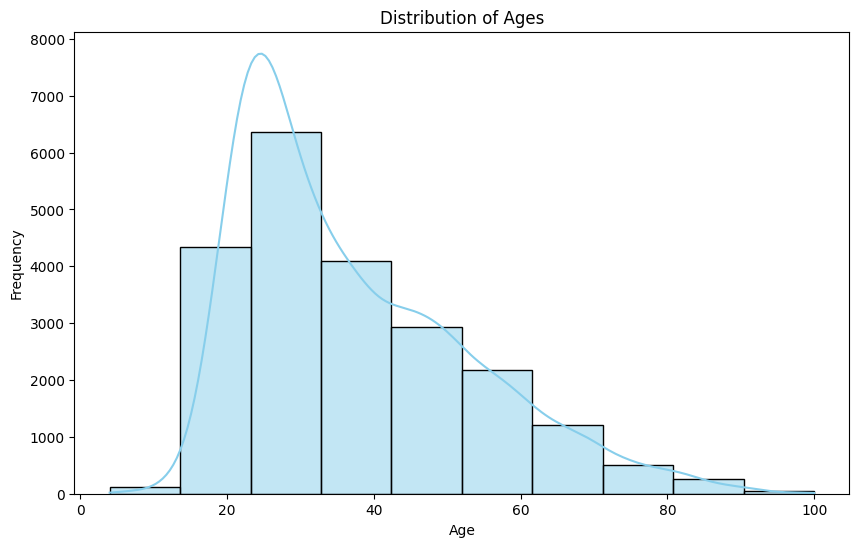

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#These libraries are used to create a histogram plot showing the distribution of ages stored in the dataframe

# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

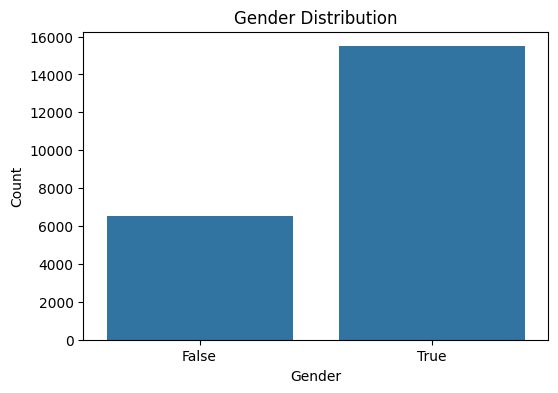

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

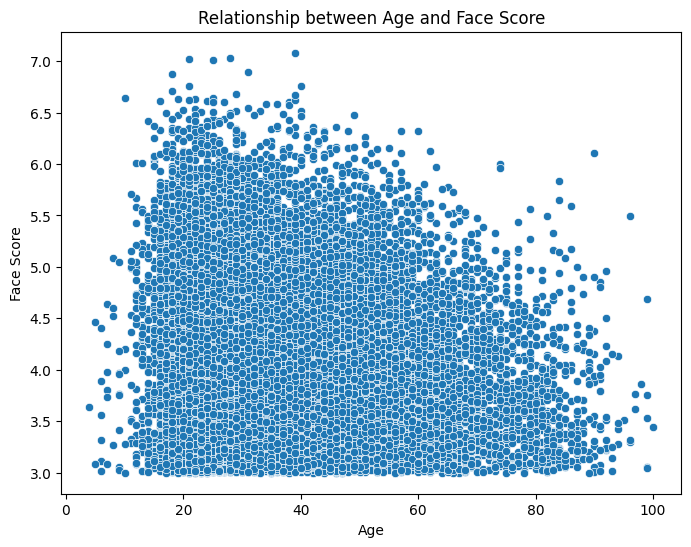

In [ ]:
# Relationship between age and face score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='face_score', data=df)
plt.title('Relationship between Age and Face Score')
plt.xlabel('Age')
plt.ylabel('Face Score')
plt.show()

In [ ]:
def balance_age_groups(df, age_column='age', min_age=10, max_age=50, reduction_factor=0.45):
    df_target_ages = df[(df[age_column] >= min_age) & (df[age_column] <= max_age)]
    target_age_counts = df_target_ages[age_column].value_counts()

    # Calculate the target count for each age group (retaining 'reduction_factor' of data)
    target_count = int(target_age_counts.median() * reduction_factor)  # Change this line

    # Sample from each age group to achieve the target count
    df_balanced = []
    for age, count in target_age_counts.items():
        df_balanced.append(df_target_ages[df_target_ages[age_column] == age].sample(n=min(count, target_count)))  # And this line

    df_balanced = pd.concat(df_balanced, ignore_index=True)

    # Combine the balanced age groups with the rest of the data
    df_final = pd.concat([df_balanced, df[(df[age_column] < min_age) | (df[age_column] > max_age)]], ignore_index=True)

    return df_final

df.info()
# Apply the function to your DataFrame
df = balance_age_groups(df.copy(), min_age=15, max_age=70)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22032 entries, 0 to 22031
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             22032 non-null  bool   
 1   face_score         22032 non-null  float64
 2   second_face_score  0 non-null      float64
 3   full_path          22032 non-null  object 
 4   age                22032 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 710.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9219 non-null   bool   
 1   face_score         9219 non-null   float64
 2   second_face_score  0 non-null      float64
 3   full_path          9219 non-null   object 
 4   age                9219 non-null   int64  
dtypes: bool(1), float64(2), int64(1), ob

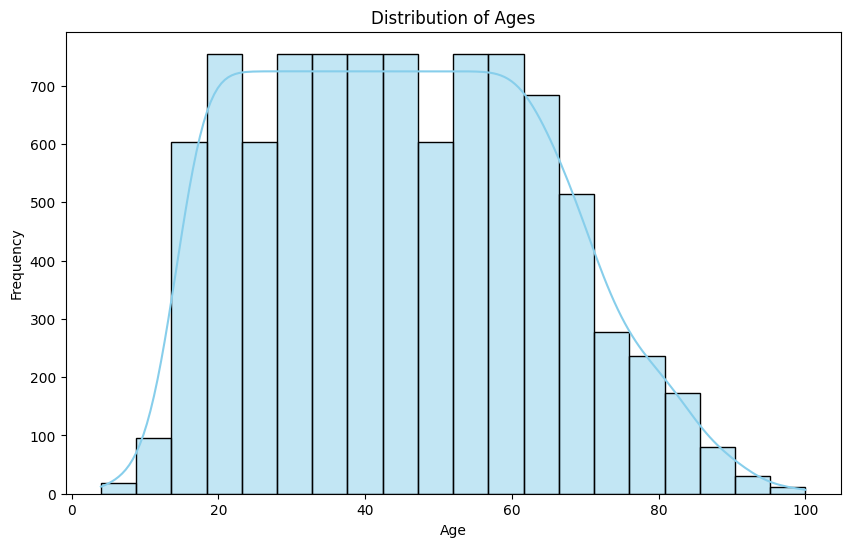

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Training and Evaluation

<class 'pandas.core.frame.DataFrame'>
Index: 9219 entries, 1657 to 7709
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9219 non-null   bool   
 1   face_score         9219 non-null   float64
 2   second_face_score  0 non-null      float64
 3   full_path          9219 non-null   object 
 4   age                9219 non-null   int64  
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 369.1+ KB
Epoch 1/8
230/230 [==============================] - 101s 393ms/step - loss: 558.9653 - mae: 17.9774 - val_loss: 303.6459 - val_mae: 14.4776
Epoch 2/8
230/230 [==============================] - 84s 355ms/step - loss: 328.4477 - mae: 14.7913 - val_loss: 301.6139 - val_mae: 14.2756
Epoch 3/8
230/230 [==============================] - 77s 336ms/step - loss: 289.3006 - mae: 13.8052 - val_loss: 262.5761 - val_mae: 13.1763
Epoch 4/8
230/230 [==============================] - 77s 334ms/ste

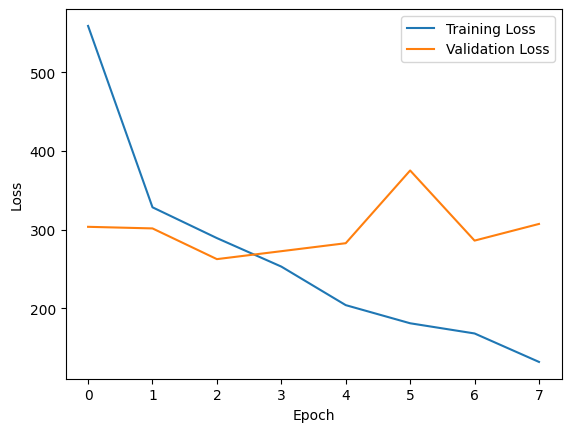

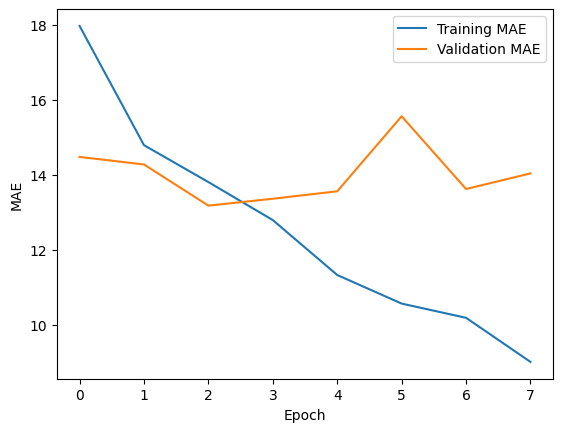

Final Training Loss: 131.9347686767578
Final Validation Loss: 307.3028259277344
Final Training MAE: 9.00033187866211
Final Validation MAE: 14.037521362304688


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image #This library is used for saving, manipulating, and opening any image format
import os #This is used to interact with the operating system allowing us to perform operations such as navigating the file system, creating and deleting directories and executing the system commands

#Tensorflow is an opensoruce machine learning framework developed by google. It provides libraries and resources for building and deploying Mchine learning models
from tensorflow import keras #Keras provides an interface that focuses on designing and training neural network model
from tensorflow.keras import layers #The layers contains a variety of pre built layers for constructing a neural network such as a dense layer, convolutional layer, and recrument layer

from PIL import ImageOps


df = df.sample(frac=1) #Retreiving a sample from the dataset and frac=1 means only on row in the dataset. shuffle the Dataset
df.info()

img_height = 500
img_width = 500
#We have found that the max height and max width of all images is 500.

batch_size = 32 #The entire dataset is divided into diffrent batch_size and then after every batch of training the model would get updated



#This function is designed to load an image from the directory and then if the image size is less than needed we would add padding to the image.
def load_and_pad_image(path, target_size):

    img = keras.preprocessing.image.load_img(path) # Loading the image from the directory using the specific path


    # Calculating the ammount of padding needed for every image to be added. if the required number of padding is less than 0 then no paading is required.
    pad_width = max(target_size[0] - img.size[0], 0)
    pad_height = max(target_size[1] - img.size[1], 0)


    #Adding padding for every image. The padding is evenly divided throughout the image
    padded_img = ImageOps.expand(img, border=(pad_width//2, pad_height//2, pad_width-(pad_width//2), pad_height-(pad_height//2)), fill=0)  # Fill with black (0)


     padded_img = padded_img.resize(target_size)
    #The image is resized to the target size

    return padded_img



def image_generator_with_padding(df, directory, batch_size, target_size):
  #directory is the directory of where the image is located
  # The batch_size is the number of images included in every batch explained upp.
  #Target size is the desired size of each image that would be resized and padded

    while True:
        for i in range(0, len(df), batch_size): #Iterating through the dataset by batchsize and then we will update the batch

            batch_df = df[i:i+batch_size] #Selecting the batch of data from the dataframe.


            images = []
            for path in batch_df['full_path']:
                img_path = os.path.join(directory, path[0]) #Finding the path for every image

                padded_img = load_and_pad_image(img_path, target_size) #Every image that is used for training is being loaded and then padded using the function that is explained above

                img_array = keras.preprocessing.image.img_to_array(padded_img) / 255.0
                #Neural Network expect input data to be in the form of numerical arrays not images.
                #Hnece We are transforming the image into an array that can be easily be read by a neural network
                #Numpy arrays provide efficient storage and operations for numerical data making them well suited for use in machine learning tasks.

                images.append(img_array)





            X = np.array(images) #After processing all the images from a batch the code converts the list of image arrays into a Numpy array
            y = batch_df['age'].values #Extracting the age label
            gender = batch_df['gender'].values.astype(float) #Extracting the gender label and then converting it to float

            #This code is the training process. We give the model the input which is the image Numpy array and the gender and then we receive an output. in the output we are also adding an extra dimention which is the age
            yield [X, np.expand_dims(gender, -1)], np.expand_dims(y, -1)



split_index = int(0.8 * len(df)) #We are saying that 80% of the dataset will be used in the training process




train_generator = image_generator_with_padding(df[:split_index], "/content/wiki_crop/", batch_size, (img_height, img_width)) #calling the function image_generator with padding
val_generator = image_generator_with_padding(df[split_index:], "/content/wiki_crop/", batch_size, (img_height, img_width))
image_input = layers.Input(shape=(img_height, img_width, 3)) #Specifying that every image we receive as input should have a 500x500 dimentions
gender_input = layers.Input(shape=(1,))
#We are using the convolution neural network model. Using this model we are using Convolutional layers Conv2D which contains filters that are small and square shaped (5x5)
#That would slide over the input image, performing the element wise multiplication with a local region of the image and then summing the result to produce a single output vlaue.
#The filter in each layer are learned during the training process, allowing the network to automatically extract relavent features from the input data.
#Typically, convolutional layer are followed by activation functions such as ReLU (Rectified Linear Unit) to introduce non-linearity into the network and increase its representational power
#Pooling helps make the picture more clear by zooming in making the picture smaller so that the computer can handle it better.

x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x) #Convolution layers and pooling convert the data to 2D features. Hence the flatten would re convert the layers into 1D.
combined = layers.concatenate([x, gender_input]) #Concatenating the output of the Dataset with the gender so that the network would consider both the image and the gender of that image.
#Dense layer are the neurons connected with each other and doing calculations when they receive input we are using 256 and then the output is overwritted by the second neral network which has 128 neurons.
x = layers.Dense(256, activation='relu')(combined)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(combined)
x = layers.Dropout(0.1)(x)
output = layers.Dense(1, activation='linear')(x) #Defining the output layer of the network with a single neuron which would represent the age value.
model = keras.Model(inputs=[image_input, gender_input], outputs=output)#Creating an instance of the model and then with two input image and the gender
model.compile(loss='mse', optimizer='adam', metrics=['mae']) #Creating an instance of the model and then specifying the loss using the Mean Square error, the optimization alogoritym using the adam scheme, and then the Mean Absolute error
steps_per_epoch = len(df[:split_index]) // batch_size  # For training data how many batch should be calculated during each epoch training
validation_steps = len(df[split_index:]) // batch_size  # For validation data how many batch should be calculated during each epoch validation


#This line trains the data using the fit method passing the train_generator, and val_generator
#The steprs per epoch and validation steps specify the number of batches to use for training and validation respectively in each epoch.
#The epoch parameter determins the number of times the entire dataset is passed forward and backward through the model.

history = model.fit(train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=8, #The entire dataset is processed 8 times ducring training
          validation_data=val_generator,
          validation_steps=validation_steps,
          verbose=1)




#Trining Loss is a measure of how well the model is performing on the training data. It represent the diffrence between the actual output model and the expected output for the training samples
#For the first Epoch the training loss is high yet it will decrease in time.

#Training Mean Absolute error is also used to evaluate the performance. It measures the average absolute diffrence between the predicted values and the actual values.



plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation mean absolute error (MAE)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Training MAE:", history.history['mae'][-1])
print("Final Validation MAE:", history.history['val_mae'][-1])


In [ ]:
model.save('age_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from tensorflow import keras
from tensorflow.keras import layers
from PIL import ImageOps
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

img_height = 500  # Target image size We will resize every image to a 500 X 500 size
img_width = 500
batch_size = 16

df = df.sample(frac=1) #Retreiving a sample from the dataset and frac=1 means only on row in the dataset.

# Function to categorize age into ranges
def categorize_age(age):
    if age <= 13:
        return 0  # Child: 1-13
    elif age <= 18:
        return 1  # Teen: 14-18
    elif age <= 39:
        return 2  # Young Adult: 19-39
    elif age <= 59:
        return 3  # Adult: 40-59
    else:
        return 4  # Senior: 60+

# Apply age categorization to the DataFrame
df['age_category'] = df['age'].apply(categorize_age) #Creating a new Coulomn in the DataFrame DF for age
split_index = int(0.80 * len(df))
train_df = df[:split_index]
val_df = df[split_index:]

#This function is explained previously.

def load_and_pad_image(path, target_size):
    # Load image
    img = keras.preprocessing.image.load_img(path)
    #Loading the image from the desired path

    # Calculate padding
    pad_width = max(target_size[0] - img.size[0], 0)
    pad_height = max(target_size[1] - img.size[1], 0)

    # Pad the image
    padded_img = ImageOps.expand(img, border=(pad_width//2, pad_height//2, pad_width-(pad_width//2), pad_height-(pad_height//2)), fill=0)  # Fill with black (0)

    # Resize the image to the target size
    padded_img = padded_img.resize(target_size)

    return padded_img
    #In this code we are loading every image and then if a image is less that 500X500 pixels we would add padding unit it reaches the desired target_size



# Modify generator to yield categorical labels
def image_generator_with_padding_classification(df, directory, batch_size, target_size):
    while True:
        for i in range(0, len(df), batch_size):
            batch_df = df[i:i+batch_size]

            # Load and pad images
            images = []
            for path in batch_df['full_path']:
                img_path = os.path.join(directory, path[0])
                padded_img = load_and_pad_image(img_path, target_size)
                img_array = keras.preprocessing.image.img_to_array(padded_img) / 255.0
                images.append(img_array)

            # Prepare features and labels
            X = np.array(images)
            y = keras.utils.to_categorical(batch_df['age_category'], num_classes=5)  # One-hot encode labels
            gender = batch_df['gender'].values.astype(float)
            yield [X, np.expand_dims(gender, -1)], y



train_generator = image_generator_with_padding_classification(train_df, "/content/wiki_crop/", batch_size, (img_height, img_width))
val_generator = image_generator_with_padding_classification(val_df, "/content/wiki_crop/", batch_size, (img_height, img_width))

# Model
image_input = layers.Input(shape=(img_height, img_width, 3))
gender_input = layers.Input(shape=(1,))

# Deeper Convolutional Base with more filters
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)

# Concatenate image features and gender
combined = layers.concatenate([x, gender_input])

x = layers.Dense(256, activation='relu')(combined) # Increased neurons
x = layers.Dense(256, activation='relu')(x) # Added another Dense layer
x = layers.Dropout(0.3)(x)  # Increased dropout

# Output layer for classification
output = layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=[image_input, gender_input], outputs=output)

# Compilation and Training
steps_per_epoch = len(train_df) // batch_size
validation_steps = len(val_df) // batch_size



# Compilation and Training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=8,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    verbose=1
                   )


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot training and validation precision
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')
plt.show()

# Plot training and validation recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')
plt.show()

# Calculate F1 score
f1_score = 2 * (history.history['precision'] * history.history['recall']) / (history.history['precision'] + history.history['recall'])

# Plot training and validation F1 score
plt.plot(f1_score, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score')
plt.show()


# Classification Evaluation

y_true = val_df['age_category']
y_pred_proba = model.predict(val_generator, steps=validation_steps)
y_pred = np.argmax(y_pred_proba, axis=1)



In [ ]:
print(split_index)
val_df.info()

7375
<class 'pandas.core.frame.DataFrame'>
Index: 3344 entries, 7646 to 6504
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3344 non-null   bool   
 1   face_score         3344 non-null   float64
 2   second_face_score  0 non-null      float64
 3   full_path          3344 non-null   object 
 4   age                3344 non-null   int64  
 5   age_category       3344 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(1)
memory usage: 160.0+ KB


# Testing Phase

Overall Accuracy: 0.73
Overall Precision: 0.7768997351492202
Overall Recall: 0.6718392873022543
Overall F1-score: 0.7122115959993626


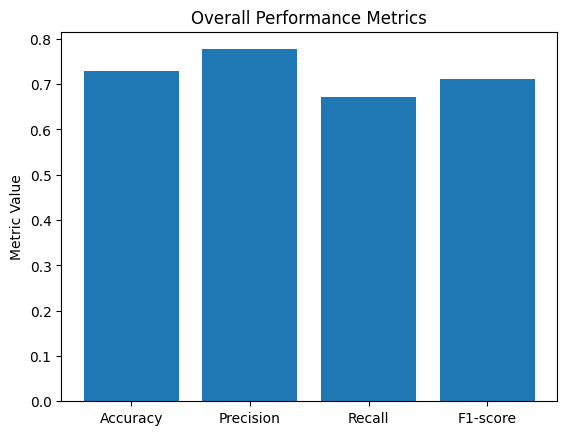

In [ ]:
val_df = df[split_index:split_index+2000]
y_true = val_df['age_category']  # Ground truth labels
batch_size = 10
num_batches = len(val_df) // batch_size  # Integer division

all_y_true = []
all_y_pred = []

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = start_idx + batch_size

    batch_df = val_df[start_idx:end_idx]

    # Prepare image data and gender for prediction
    images = []
    for path in batch_df['full_path']:
        img_path = os.path.join("/content/wiki_crop/", path[0])
        try:
            padded_img = load_and_pad_image(img_path, (img_height, img_width))
            img_array = keras.preprocessing.image.img_to_array(padded_img) / 255.0
            images.append(img_array)
        except Exception as e:
            print(f"Error loading or processing image: {img_path}")
            print(e)
            # Handle the error (e.g., skip the image or use a placeholder)

    # Check if images were loaded successfully
    if not images:
        print("No images loaded. Skipping batch.")
        continue  # Skip to the next batch

    X = np.array(images)
    gender = batch_df['gender'].values.astype(float)

    y_pred_proba = model.predict([X, np.expand_dims(gender, -1)], verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    all_y_true.extend(batch_df['age_category'].tolist())
    all_y_pred.extend(y_pred.tolist())

# Calculate Overall Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

overall_accuracy = accuracy_score(all_y_true, all_y_pred)
overall_precision = precision_score(all_y_true, all_y_pred, average='macro')
overall_recall = recall_score(all_y_true, all_y_pred, average='macro')
overall_f1 = f1_score(all_y_true, all_y_pred, average='macro')

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-score:", overall_f1)

# Plotting Overall Metrics
import matplotlib.pyplot as plt

metrics = {'Accuracy': overall_accuracy, 'Precision': overall_precision,
           'Recall': overall_recall, 'F1-score': overall_f1}
plt.bar(metrics.keys(), metrics.values())
plt.ylabel('Metric Value')
plt.title('Overall Performance Metrics')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.84      0.58      0.69       130
           2       0.71      0.82      0.76       701
           3       0.75      0.69      0.72       648
           4       0.71      0.69      0.70       498

    accuracy                           0.73      2000
   macro avg       0.78      0.67      0.71      2000
weighted avg       0.73      0.73      0.73      2000



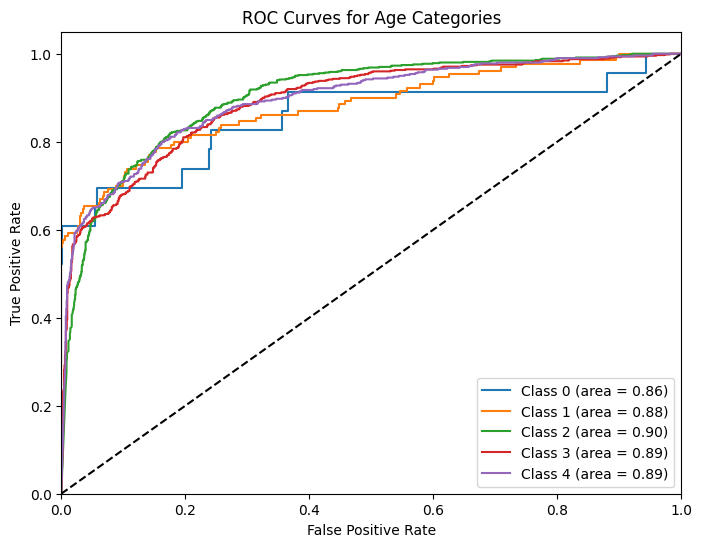

Confusion Matrix:
[[ 13   0   4   3   3]
 [  1  76  29  14  10]
 [  1   8 576  74  42]
 [  0   6 108 449  85]
 [  0   0  95  57 346]]


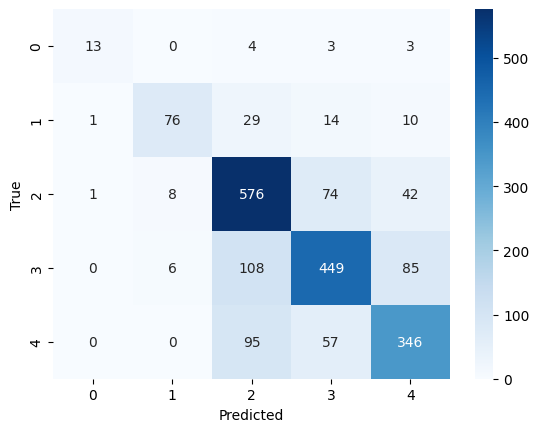

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_true = val_df['age_category']  # Ground truth labels
batch_size = 10
num_batches = len(val_df) // batch_size  # Integer division

all_y_true = []
all_y_pred = []
all_y_pred_proba = []  # Store predictions for all batches

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = start_idx + batch_size

    batch_df = val_df[start_idx:end_idx]

    # Prepare image data and gender for prediction
    images = []
    for path in batch_df['full_path']:
        img_path = os.path.join("/content/wiki_crop/", path[0])
        try:
            padded_img = load_and_pad_image(img_path, (img_height, img_width))
            img_array = keras.preprocessing.image.img_to_array(padded_img) / 255.0
            images.append(img_array)
        except Exception as e:
            print(f"Error loading or processing image: {img_path}")
            print(e)
            # Handle the error (e.g., skip the image or use a placeholder)

    # Check if images were loaded successfully
    if not images:
        print("No images loaded. Skipping batch.")
        continue  # Skip to the next batch

    X = np.array(images)
    gender = batch_df['gender'].values.astype(float)

    y_pred_proba = model.predict([X, np.expand_dims(gender, -1)], verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    all_y_true.extend(batch_df['age_category'].tolist())
    all_y_pred.extend(y_pred.tolist())
    all_y_pred_proba.extend(y_pred_proba.tolist())

# Convert accumulated predictions to NumPy array
all_y_pred_proba = np.array(all_y_pred_proba)

# Classification Report
print(classification_report(all_y_true, all_y_pred))

# ROC Curve for Each Class
y_true_onehot = keras.utils.to_categorical(all_y_true, num_classes=5)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], all_y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Age Categories')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from google.colab import drive
import shutil #This library provides functions or file operations

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
shutil.copy("/content/age_model.h5", "/content/gdrive/MyDrive/AI")

'/content/gdrive/MyDrive/AI/age_model.h5'

In [ ]:

import requests
from PIL import Image
import io

def download_and_resize_image(url, size=(500, 500)):
    # Send a HTTP request to the URL of the image
    response = requests.get(url)

    # Open the url image as a stream
    img = Image.open(io.BytesIO(response.content))

    # Resize the image
    resized_img = img.resize(size)

    # Save the resized image to disk
    resized_img.save("Test30_image.jpg")

# Replace 'image_url' with your actual image URL
download_and_resize_image('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2Fa8%2F18%2F73%2Fa818731f093c5a60a7c531abf0929bb8.jpg&f=1&nofb=1&ipt=b755922d60c99471e745ca2146b27da789e148b1256b5b89d235d85ec0d02975&ipo=images')




In [ ]:
from tensorflow import keras

model_path = "/content/gdrive/MyDrive/AI/age_model.h5"

# Load the model
model = keras.models.load_model(model_path)

print("Model successfully loaded!")

Model successfully loaded!


In [ ]:
from PIL import ImageOps
import pandas as pd #This library is used to handle the data
import numpy as np #This library is used for handeling complex numerical operations
img_height=500
img_width=500

def load_and_pad_image(path, target_size):
    # Load image

    img = keras.preprocessing.image.load_img(path)

    # Resize if larger than target size
    if img.size[0] > target_size[0] or img.size[1] > target_size[1]:
        img = img.resize(target_size)

    # Calculate padding (for smaller images)
    pad_width = max(target_size[0] - img.size[0], 0)
    pad_height = max(target_size[1] - img.size[1], 0)

    # Pad the image
    padded_img = ImageOps.expand(img, border=(pad_width//2, pad_height//2, pad_width-(pad_width//2), pad_height-(pad_height//2)), fill=0)

    return padded_img


def predict_age(model, img_path, gender):
    # Load and pad the image
    padded_img = load_and_pad_image(img_path, (img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(padded_img) / 255.0

    # Prepare the inputs
    X = np.expand_dims(img_array, axis=0)
    gender_input = np.array([[gender]])
    plt.imshow(padded_img)
    plt.show()
    # Predict the age
    predicted_age = model.predict([X, gender_input])

    return predicted_age[0][0]

img_path = "/content/samirb.png"  #"/content/Test30_image.jpg"  # Replace with your image path
gender = 1  # Replace with the gender (1 for male, 0 for female)

predicted_age = predict_age(model, img_path, gender)

print(f"The predicted age is {predicted_age}")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_age_category(model, img_path, target_size=(500, 500)):

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Assume gender is provided (replace with actual gender value)
    gender = 0  # Replace with 0 for male or 1 for female

    # Make prediction
    prediction = model.predict([img_array, np.array([[gender]])])
    predicted_class = np.argmax(prediction, axis=1)[0]

    return predicted_class

# Example usage
image_path = "Test30_image.jpg"
predicted_age_category = predict_age_category(model, image_path)

# Interpret the predicted class
age_ranges = ["1-17", "18-39", "40-59", "60+"]
print(f"Predicted Age Category: {age_ranges[predicted_age_category]}")

1/1 [==============================] - 0s 31ms/step
Predicted Age Category: 18-39
